# Interpolación

Interpolar, en palabras muy simples, es obtener una serie de puntos intermedios a partir de unos pocos que conocemos con anterioridad. Esto se hace tratando de adaptar algún tipo de polinomio de orden $n$ a $n+1$ puntos de los que tenemos. Es básicamente tratar de aproximar un comportamiento, con pocas muestras. También se le conoce a la interpolación como "splines". Un ejemplo sencillo es el siguiente:

Considere el siguiente conjunto de puntos (Gráfica de la izquierda):

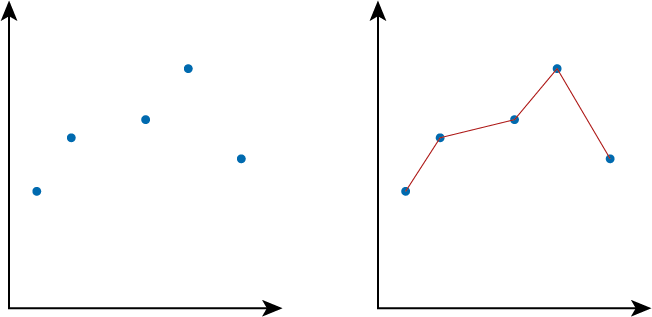

In [172]:
from IPython.display import Image
Image(filename='Dibujo_1.png')

En principio, solo sabemos los valores (x,y) de los puntos en azul, pero puede que esa información sea poca para nosotros. Tal vez no queramos tener solo 5 puntos para un determinado intervalo del eje x sino que queramos tener más. Entonces necesitaremos encontrar un conjunto de puntos mayor a partir de los que ya tenemos. Una forma fácil de obtener más puntos es simplemente definiendo varias rectas que pasen por dos de los puntos que ya conocemos, como se muestra en la figura de la derecha. Una vez sabiendo las ecuaciones de cada una de las rectas, podríamos obtener tantos puntos como quisieramos. Este tipo de interpolación se conoce como interpolación lineal, dado que obtenemos más puntos extra a partir de trazar rectas entre pares de puntos ya conocidos. 

Sin embargo, este no es el único tipo de interpolación que existe. Haciendo un rápido recorderis de geometría, sabemos que podemos definir una recta a partir de dos puntos (como en el ejemplo presentado), una parabola con tres puntos, una función cúbica con cuatro puntos, etc. En general, podríamos definir un polinomio de orden $n$ con $n+1$ puntos. Así, podríamos no solo definir la interpolación lineal sino que también los puntos extra que queremos hallar los podemos aproximar tomando conjuntos de tres puntos y aproximarlos a una parábola o conjuntos de cuatro puntos y con ellos encontrar un polinomio de tercer grado. Los dos últimos tipos de interpolación se conocen como interpolación cuadrática y cúbica. A este método también se le llama método de splines, donde un spline se define como una curva diferenciable definida por partes mediante polinomios.

Una vez conociendo superficialmente lo que significa interpolar, la pregunta es ¿Cómo podremos implementar esto en Python? Esto se puede lograr de dos formas:

## interp1d

La librería scipy tiene una clase llamada interp1d que permite hacer este tipo de interpolaciones antes mencionadas (solo hasta grado 3: cúbica). Observemos un código que lo ejemplifica:

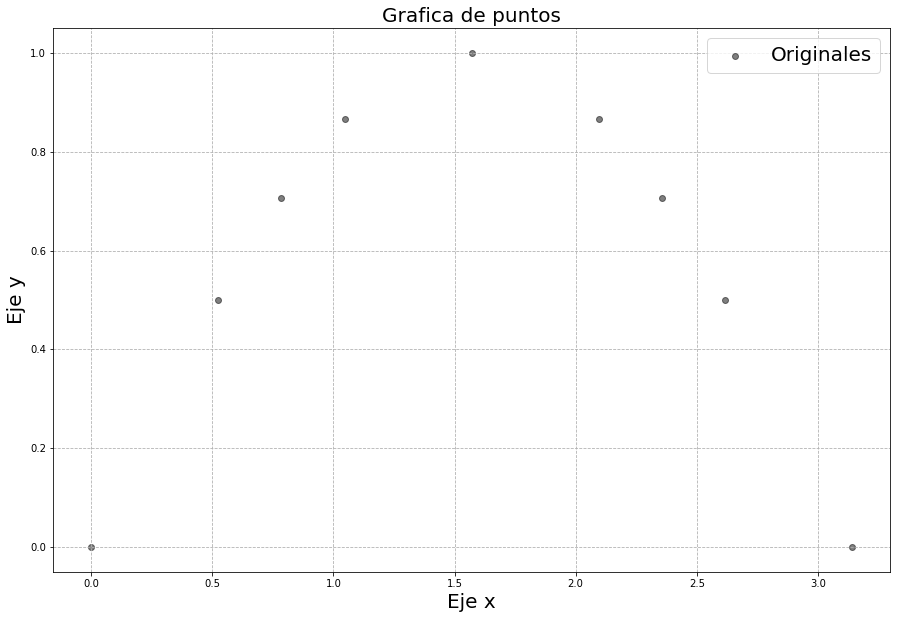

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d # Importamos la clase interp1d que nos ayudará a hacer las interpolaciones

# Supongamos que tenemos este conjunto de 9 puntos...
x = np.array([0,np.pi/6,np.pi/4,np.pi/3,np.pi/2, 2*np.pi/3, 3*np.pi/4, 5*np.pi/6, np.pi])
y = np.array([0, 0.5, 0.7071, 0.8660, 1, 0.8660, 0.7071, 0.5, 0])

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 

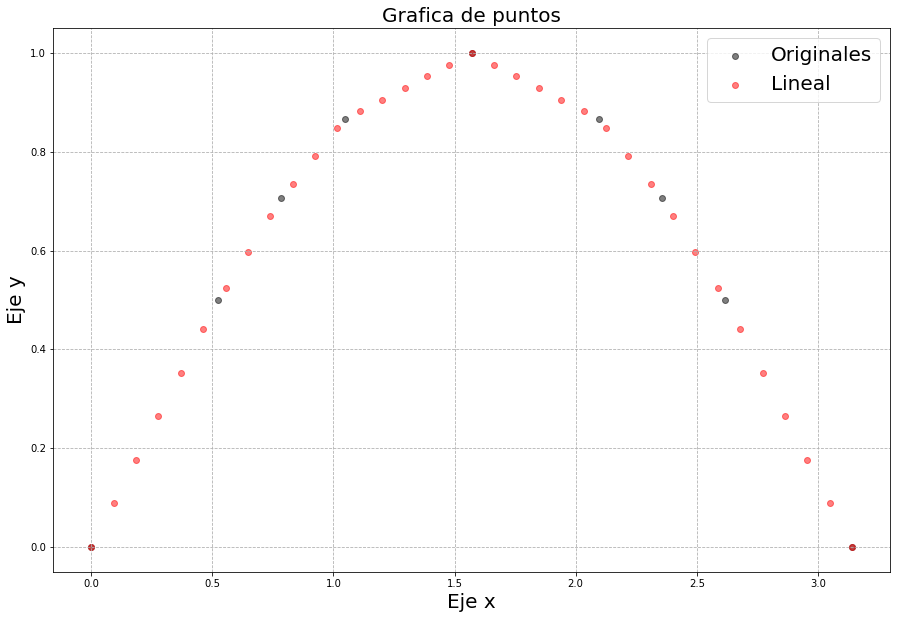

<Figure size 432x288 with 0 Axes>

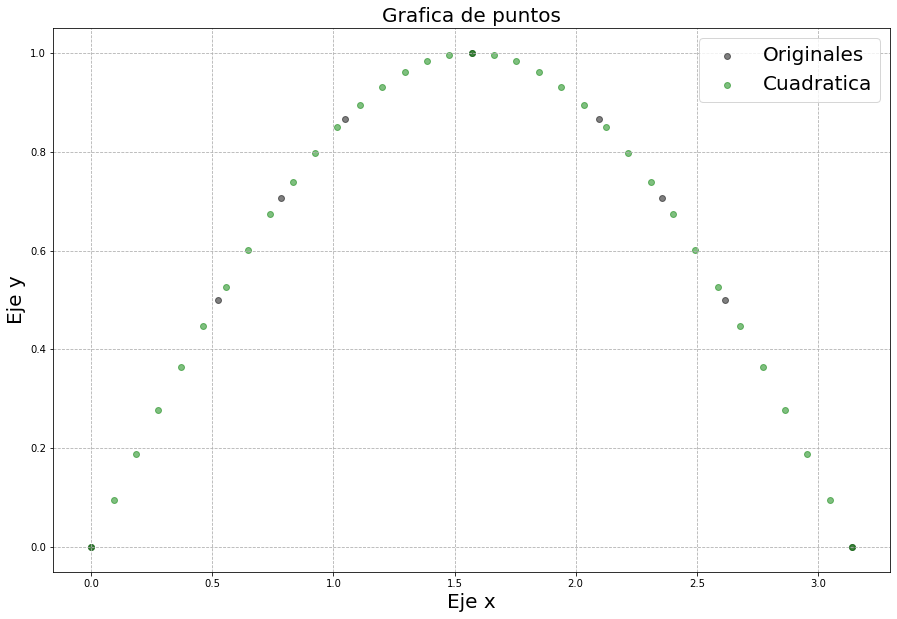

<Figure size 432x288 with 0 Axes>

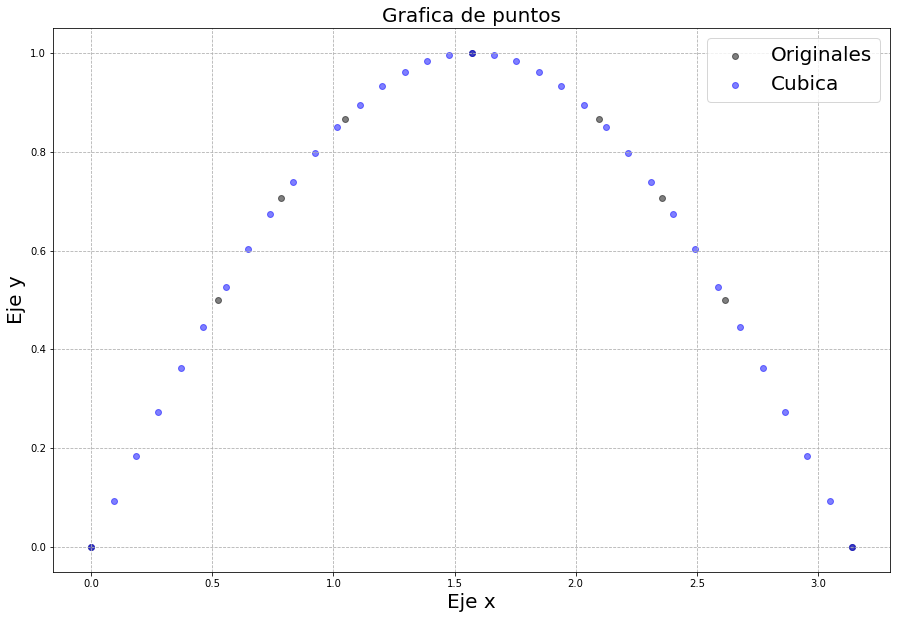

<Figure size 432x288 with 0 Axes>

In [174]:
# Ahora supongamos que en vez de solo 9 puntos, queremos tener 35...

f1 = interp1d(x, y, kind='linear') # Hacemos uso de interp1d para crear una funcion f1 que nos podra servir para obtener los 35 puntos. En este caso se hace interpolacion lineal
f2 = interp1d(x, y, kind='quadratic') # Lo mismo pero interpolacion cuadratica
f3 = interp1d(x, y, kind='cubic') # Lo mismo pero interpolacion cubica 

x_nuevo = np.linspace(0,np.pi,35) # Dado que queremos tener 35 puntos, entonces creamos un nuevo array de valores para el eje x (en el rango deseado) que no solo tengan 9 puntos sino 35
y_nuevo_lineal = f1(x_nuevo) # Hacemos uso de las funciones f1, f2 y f3 para ontener los respectivos valores de y 
y_nuevo_cuadratica = f2(x_nuevo)
y_nuevo_cubica = f3(x_nuevo)

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_lineal,color="red", alpha=0.5, label="Lineal") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_cuadratica,color="green", alpha=0.5, label="Cuadratica") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_cubica,color="blue", alpha=0.5, label="Cubica") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Así, por ejemplo, no solo podríamos saber los valores de $y$ para los $x$ originales sino que también para los valores de $x$ nuevos que definimos:

In [175]:
print("El x original es:")
print(x)
print("\n") # Imprimimos un enter
print("El y original es:")
print(y)
print("\n")
print("El x nuevo es:")
print(x_nuevo)
print("\n")
print("El y nuevo es:")
print(y_nuevo_cubica)

El x original es:
[0.         0.52359878 0.78539816 1.04719755 1.57079633 2.0943951
 2.35619449 2.61799388 3.14159265]


El y original es:
[0.     0.5    0.7071 0.866  1.     0.866  0.7071 0.5    0.    ]


El x nuevo es:
[0.         0.09239978 0.18479957 0.27719935 0.36959914 0.46199892
 0.5543987  0.64679849 0.73919827 0.83159806 0.92399784 1.01639762
 1.10879741 1.20119719 1.29359698 1.38599676 1.47839654 1.57079633
 1.66319611 1.75559589 1.84799568 1.94039546 2.03279525 2.12519503
 2.21759481 2.3099946  2.40239438 2.49479417 2.58719395 2.67959373
 2.77199352 2.8643933  2.95679309 3.04919287 3.14159265]


El y nuevo es:
[0.         0.09266127 0.18424007 0.2740701  0.36148504 0.44581858
 0.5264044  0.60257619 0.67366763 0.73901575 0.79803436 0.85021402
 0.89506276 0.93225266 0.96156165 0.98276941 0.99565563 1.
 0.99565563 0.98276941 0.96156165 0.93225266 0.89506276 0.85021402
 0.79803436 0.73901575 0.67366763 0.60257619 0.5264044  0.44581858
 0.36148504 0.2740701  0.18424007 0.0926612

Por ejemplo, no solo podemos saber que, como originalmente sabíamos, si $x=3.141592 = \pi $ entonces $y=0$ sino que con los nuevos valores de x sabemos que, usando la interpolación cúbica, si $x=0.09239978$ entonces $y=0.09266127$. Los puntos originales los tomé de la función seno, de forma que lo que hicimos sin saberlo es que aproximamos la función seno con 35 puntos a partir de 9 que teníamos originalmente. En radianes, el seno de $x=0.09239978$ es $0.0922683556$, que es un valor muy cercano al $y$ que hallamos, de forma que esta interpolación cumplió su objetivo muy bien! 

## Nota

Si queremos concatenar (unir) un array a otro definido previamente podemos hacer lo siguiente:

In [5]:
import numpy as np

array_1 = np.array([1,2,3,4])
array_2 = np.array([5,6,7,8])

array = np.concatenate((array_1, array_2))

print(array)

[1 2 3 4 5 6 7 8]


Algo interesante que podemos hacer es lo siguiente: Supongamos que ya no todos los puntos los quiero aproximar solo con interpolacion lineal o solo con cuadratica o solo con cúbica. Supongamos que para $0 \leq x \leq 1$ quiero que los nuevos puntos se encuentren con interpolacion cuadratica (en este rango quiero 10 puntos), para $1 < x \leq 2$ con interpolacion lineal (en este rango quiero 15 puntos) y para $2<x \leq \pi$ con interpolacion cúbica (en este rango quiero 10 puntos). Para eso hagamos lo siguiente:

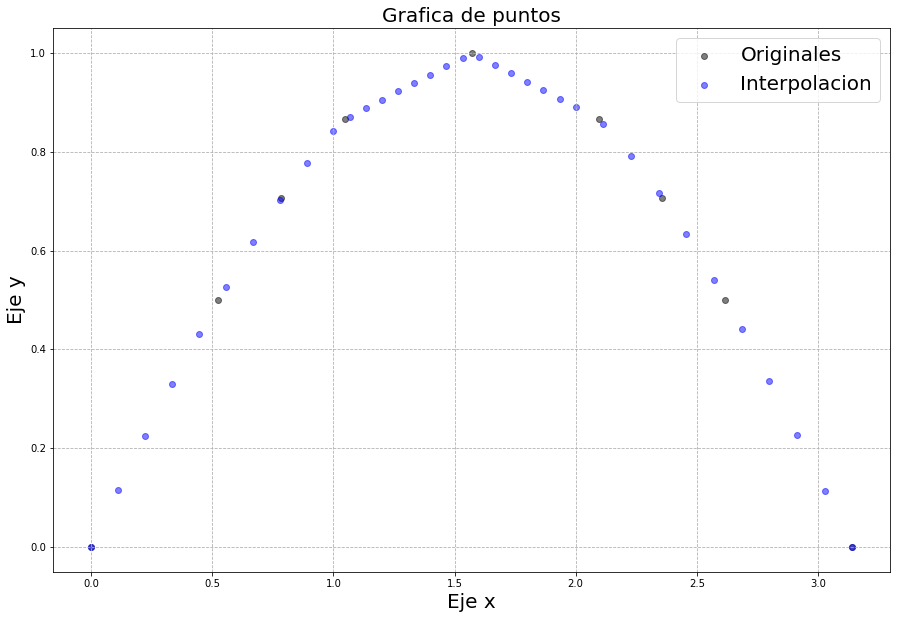

<Figure size 432x288 with 0 Axes>

In [176]:
x_1 = np.linspace(0,1,10) # Definimos la primera porcion del eje x con 10 puntos
x_2 = np.linspace(1,2,16) # Empezamos definiendo la segunda porcion del eje x, pero te preguntarás ¿Por qué 16 puntos si debían ser 15?! La respuesta es que el valor de x=1, que ya está en x_1, se repite en x_2, así que debemos eliminarlo... 
x_2 = x_2[1:] # Ahora definimos x_2 pero como un array que tiene desde el segundo dato del x_2 viejo en adelante, es decir, eliminamos la primera posicion del array, que es el que corresponde a x=1
x_3 = np.linspace(2,np.pi,11) # Lo mismo que para x_2
x_3 = x_3[1:]

y_1 = f2(x_1) # Definimos los respectivos valores de y
y_2 = f1(x_2)
y_3 = f3(x_3)

# Por el momento tenemos tres arrays de "x" y tres arrays de "y" separados, pero necesitamos unificar los tres arrays de "x" en uno solo y los tres de "y" de la misma forma. ¿Cómo lo hacemos? Observa...

x_definitivo = np.concatenate((x_1,x_2,x_3)) # Con np.concatenate podemos "pegar" o unir arrays. Si x_1 = [A,B], x_2 = [C,D] y x_3 = [E,F] entonces x_definitivo = [A,B,C,D,E,F]
y_definitivo = np.concatenate((y_1,y_2,y_3))

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_definitivo,y_definitivo,color="blue", alpha=0.5, label="Interpolacion") # Graficamos los nuevos puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Hay otros tipos (kind) de interpolaciones que se pueden implementar con interp1d (nearest, previous y next), que se pueden visualizar en https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#spline-interpolation-in-1-d-procedural-interpolate-splxxx . Sin embargo creo que es mejor ir a la página y ver de que tratan, dado que son interpolaciones poco convencionales. 

## splxxx

Ahora observemos la otra forma de obtener una interpolacion con scipy. Supongamos que queremos desarrollar el mismo ejemplo de obtener 35 puntos a partir de 9 ya conocidos. En esta ocasión se haría de la siguiente forma:

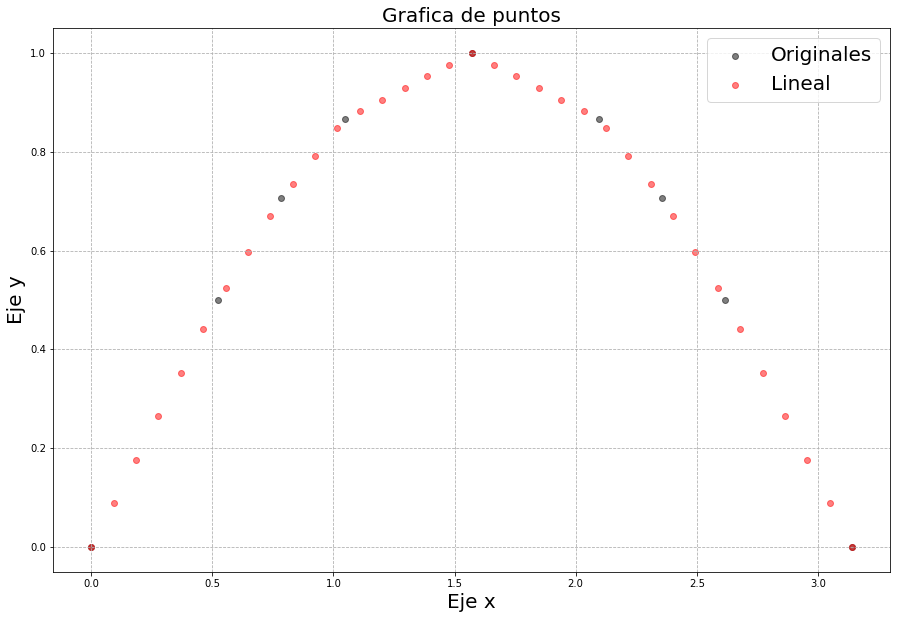

<Figure size 432x288 with 0 Axes>

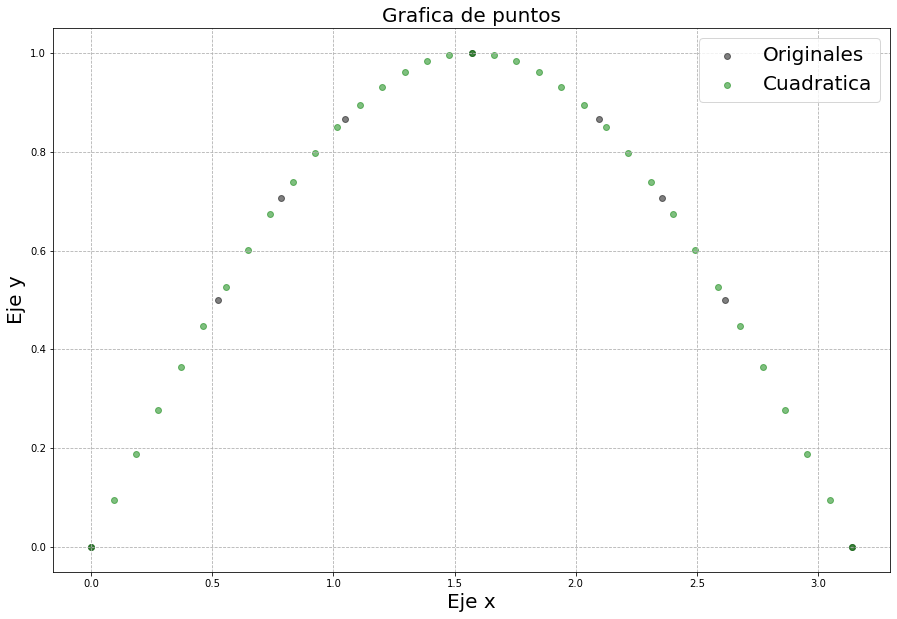

<Figure size 432x288 with 0 Axes>

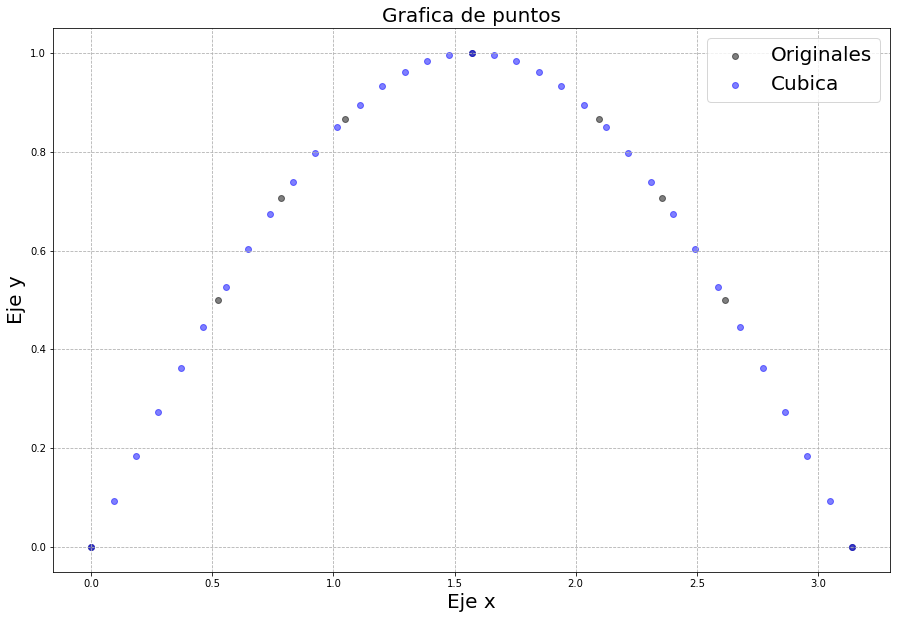

<Figure size 432x288 with 0 Axes>

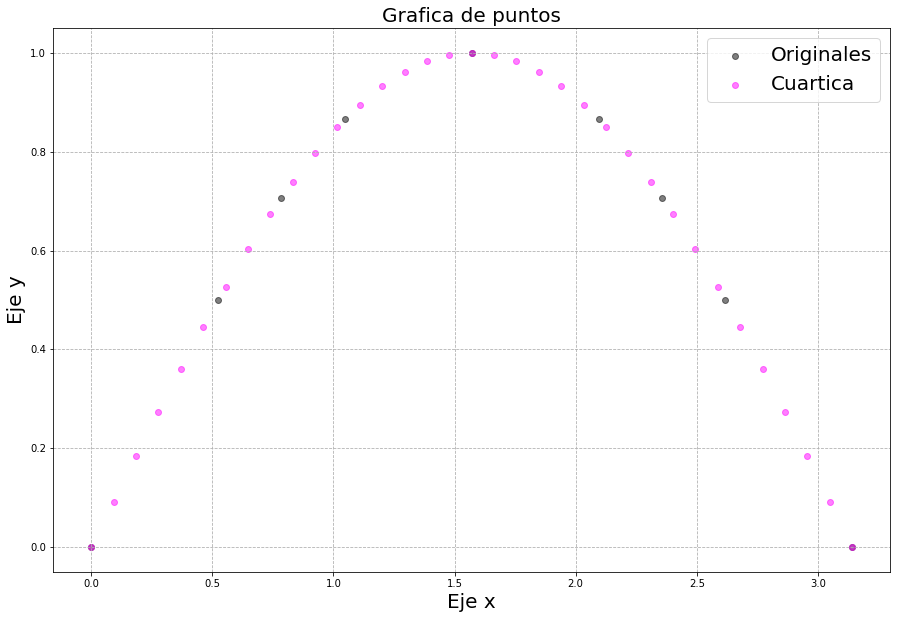

<Figure size 432x288 with 0 Axes>

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate # Importamos la clase interpolate que nos ayudará a hacer las interpolaciones

# Supongamos que tenemos este conjunto de 9 puntos...
x = np.array([0,np.pi/6,np.pi/4,np.pi/3,np.pi/2, 2*np.pi/3, 3*np.pi/4, 5*np.pi/6, np.pi])
y = np.array([0, 0.5, 0.7071, 0.8660, 1, 0.8660, 0.7071, 0.5, 0])

f1 = interpolate.splrep(x, y, s=0, k=1) # Creamos una funcion de interpolacion para los puntos "x" y "y", similar a lo hecho con interp1d. El parámetro "s" indica la suavidad de la curva (smoothing). El valor máximo de "s" debe ser s= m - sqrt(2m), donde m es el número de puntos nuevos que se quieren encontrar. Por el momento dejemos el suavizado de los puntos en 0. k es el orden de la interpolación: si k=1, es lineal, k=2 es cuadratica, k=3 es cubica y así sucesivamente.
f2 = interpolate.splrep(x, y, s=0, k=2)
f3 = interpolate.splrep(x, y, s=0, k=3)
f4 = interpolate.splrep(x, y, s=0, k=4) # Esto es nuevo! Interpolacion con polinomios de grado 4 


x_nuevo = np.linspace(0,np.pi,35) # Dado que queremos tener 35 puntos, entonces creamos un nuevo array de valores para el eje x (en el rango deseado) que no solo tengan 9 puntos sino 35
y_nuevo_lineal = interpolate.splev(x_nuevo, f1, der=0) # Hacemos uso de spldev para encontrar los respectivos valores de y. Los primeros dos parámetros son los nuevos valores de x y la funcion f1 de interpolación. El tercer argumento permite obtener derivadas de la curva que forman nuestros nuevos puntos: si der=0 obtenemos los valores de y, si der=1 obtenemos dy/dx y así sucesivamente. 
y_nuevo_cuadratica = interpolate.splev(x_nuevo, f2, der=0)
y_nuevo_cubica = interpolate.splev(x_nuevo, f3, der=0)
y_nuevo_cuartica = interpolate.splev(x_nuevo, f4, der=0)

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_lineal,color="red", alpha=0.5, label="Lineal") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()


figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_cuadratica,color="green", alpha=0.5, label="Cuadratica") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_cubica,color="blue", alpha=0.5, label="Cubica") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_cuartica,color="magenta", alpha=0.5, label="Cuartica") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Lo primero que hay que notar es que los resultados son los mismos que para interp1d. Sin embargo hay cosas nuevas. Lo primero es que ahora no solo se puede hacer hasta interpolaciones cubicas sino con incluso polinomios de mayor orden. Lo segundo es que podemos aplicar suavizado a las curvas y lo tercero es que ponemos obtener directamente derivadas de los datos. Ya probamos distintos valores de k (orden del polinomio usado para las interpolaciones). Ahora probemos distintos valores de s. 

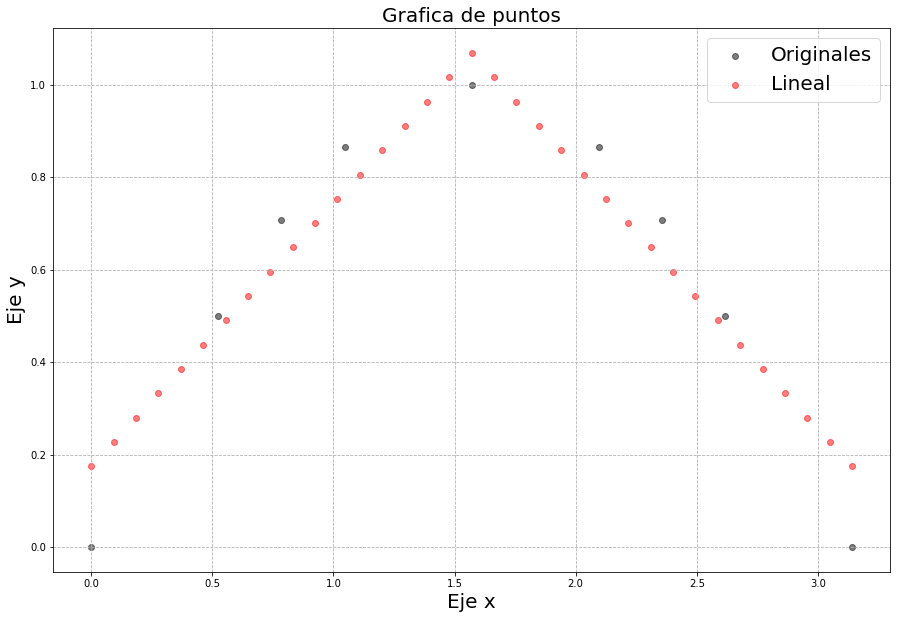

<Figure size 432x288 with 0 Axes>

In [178]:
f1_s10 = interpolate.splrep(x, y, s=0.1, k=1)
y_nuevo_lineal_s10 = interpolate.splev(x_nuevo, f1_s10, der=0)

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_lineal_s10,color="red", alpha=0.5, label="Lineal") # Graficamos los nuevos 35 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Observamos que para un valor de $s=0.1$ la curva ya se suavizó tanto que aproxima los puntos a dos lineas rectas... Mala idea. Ahora miremos qué pasa si cambiamos el parametro "der".

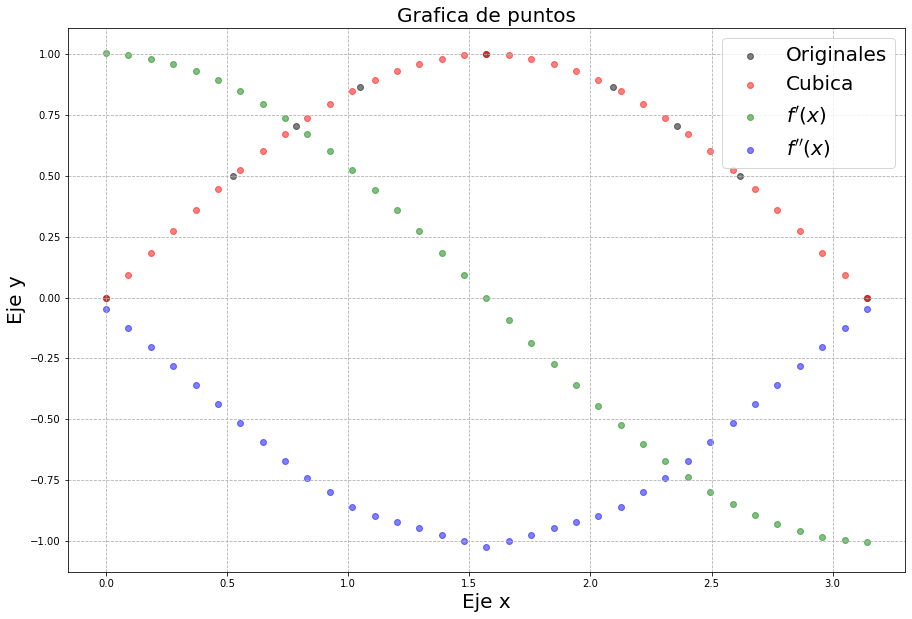

<Figure size 432x288 with 0 Axes>

In [179]:
f3 = interpolate.splrep(x, y, s=0, k=3)
y_nuevo_cubica = interpolate.splev(x_nuevo, f3, der=0)
y_nuevo_cubica_prima = interpolate.splev(x_nuevo, f3, der=1) # Primera derivada
y_nuevo_cubica_prima2 = interpolate.splev(x_nuevo, f3, der=2) # Segunda derivada


figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo_cubica,color="red", alpha=0.5, label="Cubica") # Graficamos los nuevos 35 puntos
plt.scatter(x_nuevo,y_nuevo_cubica_prima,color="green", alpha=0.5, label=r"$f'(x)$")
plt.scatter(x_nuevo,y_nuevo_cubica_prima2,color="blue", alpha=0.5, label=r"$f''(x)$")
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Podemos observar que efectivamente se pudo obtener la derivada de nuestros puntos hallados con interpolación (rojo). Conociendo que los puntos rojos deben seguir la función sin(x), los verdes, que son la primera derivada, deben ser cos(x) y los azules, que son la segunda derivada, deben ser -sin(x) y observando a simple vista se observa que efectivamente los puntos si siguen estas tendencias. De forma que efectivamente el parámetro "der" encuentra la derivada de los puntos encontrados a través de interpolación.

Otra cosa interesante que se puede encontrar con este método son las raices (los ceros) de los datos interpolados:

In [180]:
ceros = interpolate.sproot(f3) # Encuentra los valores de x para los cuales y se vuelve cero (las raices). 
print(ceros)

[3.14159265]


# Splines parametricos

Supongamos ahora que la curva que queremos interpolar no es del tipo $y=f(x)$ sino que es una curva paramétrica $x=f(t), y=g(t)$, con $t$ el parámetro. Esto se puede lograr de la siguiente manera: Supongamos que queremos hacer interpolación a los siguientes puntos: 

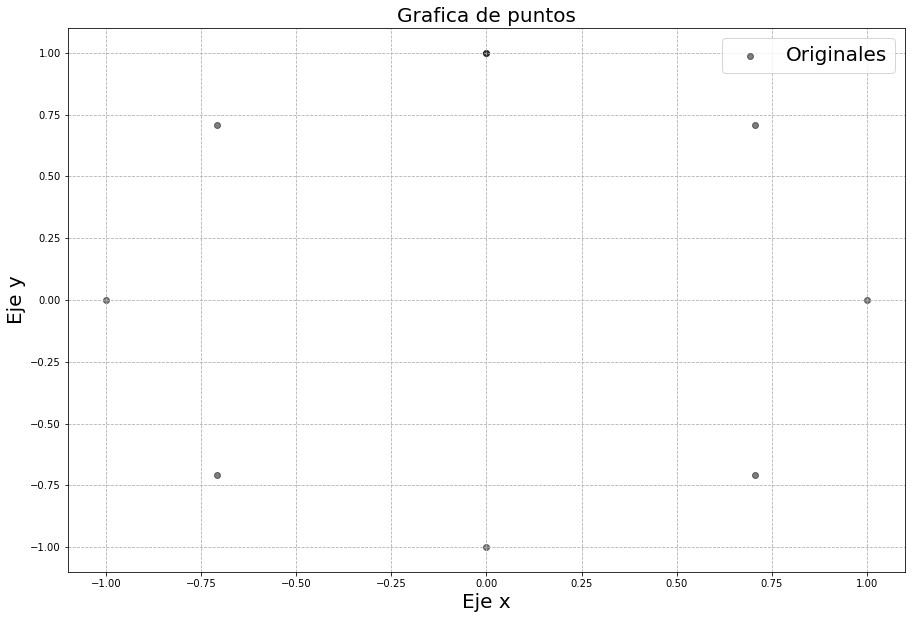

<Figure size 432x288 with 0 Axes>

In [181]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([0, 0.7071, 1, 0.7071, 0, -0.7071, -1, -0.7071, 0])
y = np.array([1, 0.7071, 0, -0.7071, -1, -0.7071, 0, 0.7071, 1])

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Esto tiene bastante pinta de una elipse o un círculo... se nota que no es una función 1 a 1...puede ser una curva paramétrica! Intentemos:

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


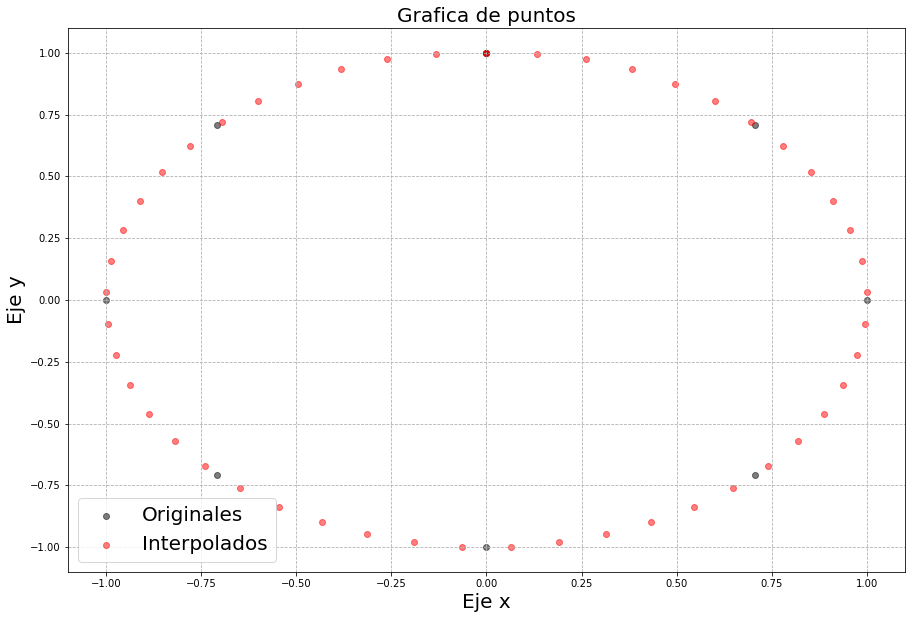

<Figure size 432x288 with 0 Axes>

In [182]:
f, t_tentativo = interpolate.splprep([x, y], s=0, k=3) # Encontramos la funcion de interpolacion junto con un array que representa los valores del parametro t. Será una interpolación cubica
print(t_tentativo) # Cuando imprimimos t nos damos cuenta que es un array que va desde 0 hasta 1. Esto quiere decir que los valores inferior y superior del parámetro deben tomarse como t=0 y t=1 respectivamente
t_nuevo = np.linspace(0,1,50) # Supongamos que queremos encontrar 50 puntos a través de la interpolación... Los límites inferiores (t=0) y superiores (t=1) son los que encontramos imprimiendo "t_tentativo" 
x_nuevo, y_nuevo = interpolate.splev(t_nuevo, f) # Similar a lo hecho en interpolación normal anteriormente

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo,color="red", alpha=0.5, label="Interpolados")
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

## Interpolación multivariable

La interpolación de puntos no solo se limita a funciones de una sola variable (es decir, a puntos sobre un plano $xy$), sino que puede ser extendida a más dimensiones, específicamente a tres. Supongamos que tengo el siguiente conjunto de puntos en $x,y$ y $z$

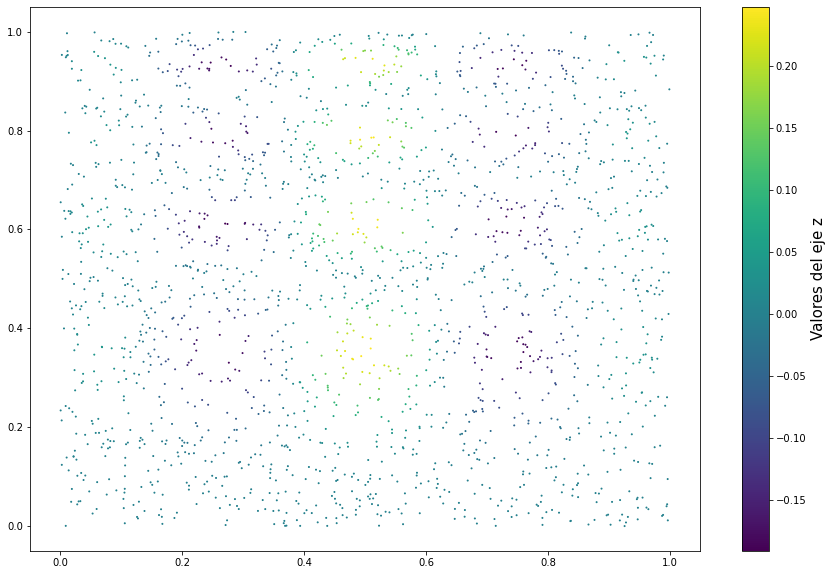

In [183]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import griddata # Nos servirá para hacer la interpolación

def funcion(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

x = np.random.rand(2000) # Creamos un array de 1000 numeros aleatorios entre 0 y 1. Esto quiere decir que los valores de x están entre 0 y 1
y = np.random.rand(2000) # Creamos un array de 1000 numeros aleatorios entre 0 y 1. Esto quiere decir que lso valores de y están entre 0 y 1
z = funcion(x,y) # Aunque los valores de z los sacamos de la función llamada "funcion", haremos de cuenta que son un conjunto de datos que nos pasaron previamente y no sabemos de donde salen...

figura = plt.figure(figsize=(15,10))
puntos = plt.scatter(x,y,c=z,cmap="viridis", s=1) # Graficamos los puntos x,y. El color de los puntos representa el valor del eje z, por eso se escribe c=z, para que el color esté dado por los valores del eje z, con un mapa de color "viridis" y un tamaño de punto s=1.
barra_de_colores = figura.colorbar(puntos) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Valores del eje z", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

Para poder interpolar los puntos que tenemos, necesitamos hacer uso de la clase griddata de scipy. Se usa como se muestra a continuación:

In [184]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] # La funcion np.mgrid[A,B] retorna dos matrices (arrays) grid_x y grid_y de valores según las especificaciones de A y B. En este caso A=0:1:100j y B=0:1:200j. El significado de A y B es el siguiente: A=0:1:100j y B=0:1:200j nos dice que la primera matriz grid_x y la segunda grid_y tendrán 100 filas y 200 columnas. La primera matriz tiene todos los vectores columna iguales y cada vector columna estará compuesto de 100 elementos (equidistanciados unos de otros) entre 0 y 1. La segunda matriz tiene todos sus vectores fila iguales y cada vector fila estará compuesto de 200 elementos (equidistanciados unos de otros) entre 0 y 1. Se escoge que los valores esten entre 0 y 1 porque son justo el mínimo y máximo que toman los puntos en "x" y "y" respectivamente.

# Estas matrices, en pocas palabras, nos ayudan a definir los pares (x,y) del plano xy y son una parte esencial de la interpolacion en tres dimensiones.

print("Primera matriz:")
print(grid_x)
print("\n")
print("Tamaño de la primera matriz:")
print(grid_x.shape)
print("\n")
print("Segunda matriz:")
print(grid_y)
print("\n")
print("Tamaño de la segunda matriz:")
print(grid_y.shape)

Primera matriz:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01010101 0.01010101 0.01010101 ... 0.01010101 0.01010101 0.01010101]
 [0.02020202 0.02020202 0.02020202 ... 0.02020202 0.02020202 0.02020202]
 ...
 [0.97979798 0.97979798 0.97979798 ... 0.97979798 0.97979798 0.97979798]
 [0.98989899 0.98989899 0.98989899 ... 0.98989899 0.98989899 0.98989899]
 [1.         1.         1.         ... 1.         1.         1.        ]]


Tamaño de la primera matriz:
(100, 200)


Segunda matriz:
[[0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]
 [0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]
 [0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]
 ...
 [0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]
 [0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]
 [0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]]


Tamaño de la segunda matriz:
(100,

In [185]:
puntos_xy = np.vstack((x,y)).T # Tambien necesitamos pegar los valores de "x" y "y" en una matriz, cuyos vectores columna son "x" y "y". La funcion vstack permite unir dos arrays en una matriz, haciendo que, si tenemos los arrays x=[A,B,C,D] y y=[E,F,G,H], entonces con vstack tenemos la matriz 

# M = A B C D 
#     E F G H

# Sin embargo, así como está los arrays "x" y "y" son vectores fila y no columna, por lo que necesitamos hacer el transpuesto para que los vectores fila se vuelvan vectores columna como se desea 

print(puntos_xy)

[[0.02278818 0.35552792]
 [0.38963471 0.80924084]
 [0.61086412 0.60506466]
 ...
 [0.75359767 0.25861556]
 [0.38095813 0.10298236]
 [0.11851234 0.48497097]]


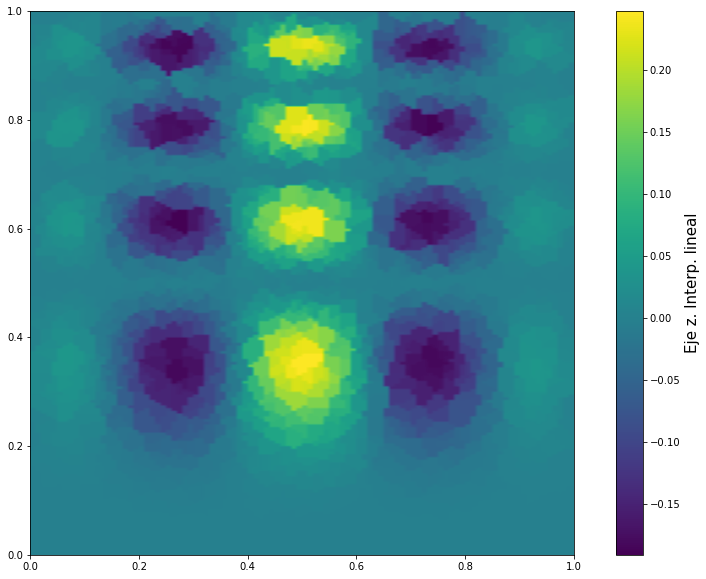

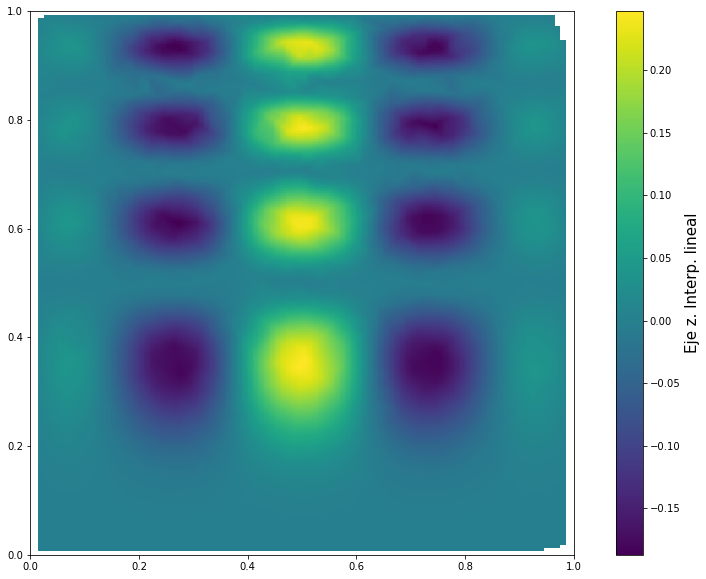

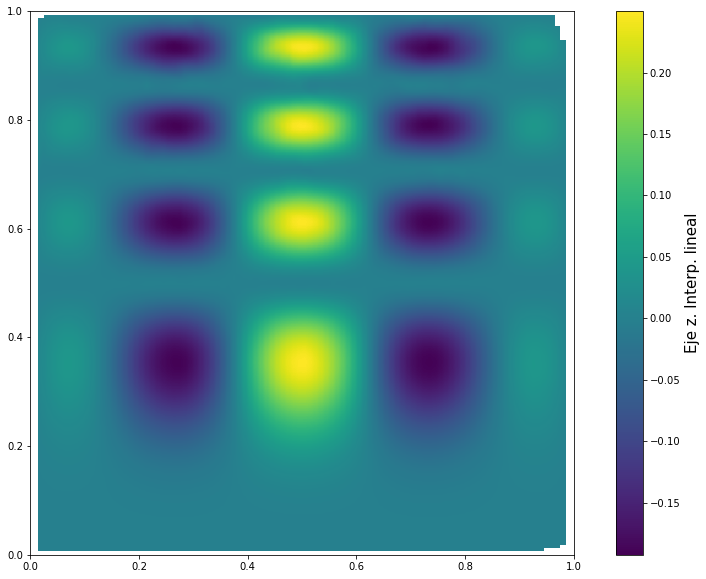

In [186]:
# Ahora si usamos griddata. Para usar griddata necesitamos todas las variables declaradas anteriormente como se puede observar a continuación. Los valores de z se nos darán como una matriz, que podremos graficar como una imagen. 

matriz_z0 = griddata(puntos_xy, z, (grid_x, grid_y), method='nearest') # Hacemos interpolación aproximando un punto a su vecino cercano
matriz_z1 = griddata(puntos_xy, z, (grid_x, grid_y), method='linear') # Hacemos interpolacion lineal
matriz_z2 = griddata(puntos_xy, z, (grid_x, grid_y), method='cubic') # Hacemos interpolacion cúbica
# Estas son los únicos tipos de interpolación posible
# Hay una peculiaridad con esta función y es que nos devuelve nuestra imagen rotada 90 grados hacia la izquierda de la que queremos, así que redefiniremos las matrices 

matriz_z0_new = np.rot90(matriz_z0) # Ahora nuestra nueva matriz_z0 será la matriz_z0 vieja pero rotada 90 grados a la derecha
matriz_z1_new = np.rot90(matriz_z1)
matriz_z2_new = np.rot90(matriz_z2)


figura = plt.figure(figsize=(15,10))
imagen_z0 = plt.imshow(matriz_z0_new,cmap="viridis", extent=(0,1,0,1)) # Graficamos matriz_z0. Hay un término extra que es desconocido y es extent=(0,1,0,1). Este término permite redefinir los valores máximos y mínimos de ambos ejes de la imagen. El primer par de números 0,1 indica que el eje horizontal de la imagen irá de 0 a 1 y el segundo par 0,1 indica que el eje vertical también irá entre 0 y 1
barra_de_colores = figura.colorbar(imagen_z0) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Eje z. Interp. lineal", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

figura = plt.figure(figsize=(15,10))
imagen_z1 = plt.imshow(matriz_z1_new,cmap="viridis", extent=(0,1,0,1)) 
barra_de_colores = figura.colorbar(imagen_z1) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Eje z. Interp. lineal", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

figura = plt.figure(figsize=(15,10))
imagen_z2 = plt.imshow(matriz_z2_new,cmap="viridis", extent=(0,1,0,1)) 
barra_de_colores = figura.colorbar(imagen_z2) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Eje z. Interp. lineal", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

Grafiquemos ahora la funcion original para ver qué tanto difieren las interpolaciones de lo que en verdad debería ocurrir:

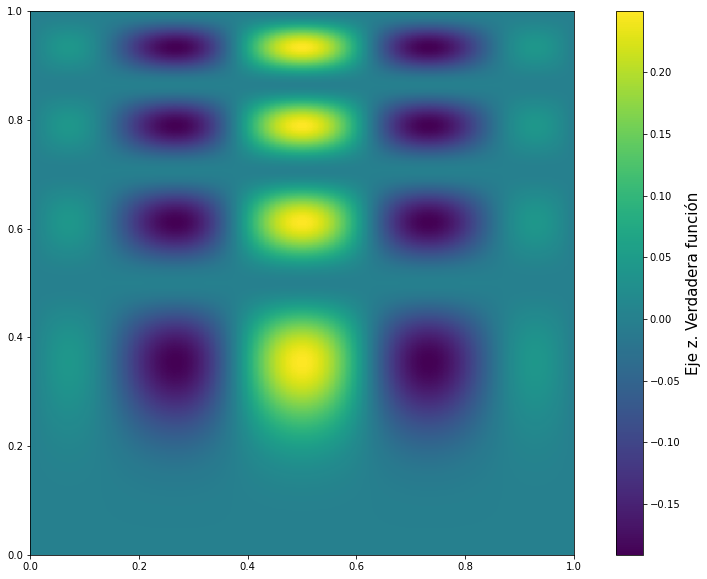

In [187]:
imagen_z_verdadera = funcion(grid_x,grid_y) # Obtenemos nuestra funcion en forma matricial, usando grid_x y grid_y que obtuvimos anteriormente. La función se evalúa con grid_x y grid_y ya que son las variables que usamos para la interpolación. Si matriz_z0, matriz_z1 y matriz_z2 dependen de grid_x y grid_y, entonces también debe depender de las mismas variables la imagen verdadera para poder equiparar los resultados.
imagen_z_verdadera_new = np.rot90(imagen_z_verdadera) # A esta también hay que rotarla

figura = plt.figure(figsize=(15,10))
imagen_z0 = plt.imshow(imagen_z_verdadera_new,cmap="viridis", extent=(0,1,0,1)) # Graficamos matriz_z0. Hay un término extra que es desconocido y es extent=(0,1,0,1). Este término permite redefinir los valores máximos y mínimos de ambos ejes de la imagen. El primer par de números 0,1 indica que el eje horizontal de la imagen irá de 0 a 1 y el segundo par 0,1 indica que el eje vertical también irá entre 0 y 1
barra_de_colores = figura.colorbar(imagen_z0) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Eje z. Verdadera función", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

Se observa que incluso con las interpolaciones lineales y cubicas ya tenemos una muy buena aproximación a lo que debería ser la función real!.

Para darnos una idea de cómo se ven los puntos originales en 3D los graficaremos: 

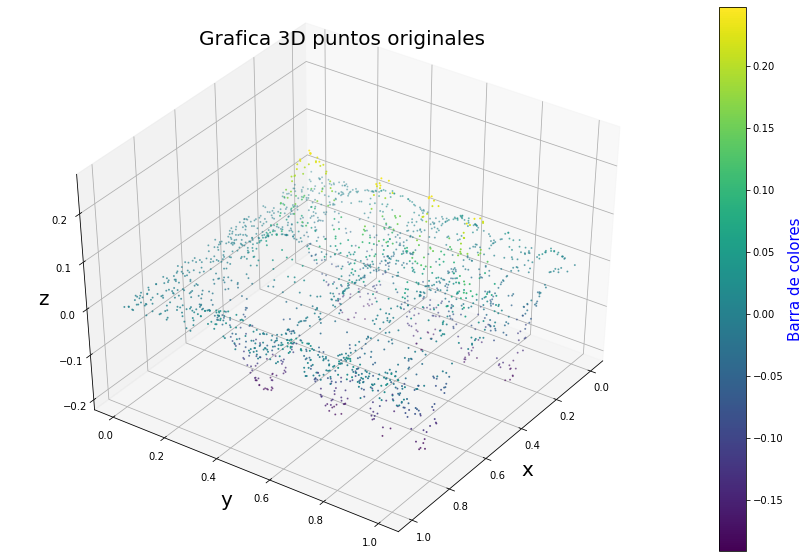

In [188]:
figura = plt.figure(figsize=(15,10)) # Creamos la figura, con un tamaño de 15x10 unidades de Python

ax = plt.axes(projection='3d') # Creamos un conjunto de ejes 3D llamados "ax"

superficie = ax.scatter(x,y,z,c=z,cmap="viridis", s=1) # con ax.scatter graficamos la superficie a punta de puntos. Los primeros tres parámetros son x,y,z. Luego con c=z exigimos que el color de los puntos se determine por la altura en z de los puntos. Luego ponemos el mapa de colores de la superficie. Los posibles mapas de colores se pueden encontrar en: https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html. También se pueden usar los demás parámetros que usamos generalmente con plt.scatter()

barra_de_colores = figura.colorbar(superficie) # Graficamos la barra de colores asociada a la superficie
barra_de_colores.set_label("Barra de colores", rotation=90, fontsize=15, color="blue") # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90 gradios y los demás parámetros son los mismos que se le pueden asignar a cualquier otro título, como con plt.title() o plt.xlabel()

ax.set_title("Grafica 3D puntos originales", fontsize=20) # con ax.set_title() podemos modificar el título de la gráfica. Los parámetros son los mismos que plt.title()
ax.set_xlabel("x", fontsize=20) # con ax.set_xlabel() modificamos el nombre del eje x. Los parámetros son los mismos que plt.xlabel(). Lo mismo para los demás ejes.
ax.set_ylabel("y", fontsize=20)
ax.set_zlabel("z", fontsize=20)


ax.view_init(40,35) # Giramos la gráfica 40 grados polarmente y 35 grados azimutalmente
plt.show()

Para tener los arrays "x", "y" y "z" por separado usando los datos que encontramos por interpolación se puede hacer lo siguiente: Supongamos que queremos usar los valores de z obtenidos con interpolacion cubica:

In [189]:
tamano_matrices = np.shape(grid_x) # El tamaño de grid_x, grid_y y matriz_z2 (la matriz obtenida con interpolacion cubica) es el mismo.
filas = tamano_matrices[0]
columnas = tamano_matrices[1]

x_nuevo = [] # Creamos listas vacias que almacenaran los puntos nuevos 
y_nuevo = []
z_nuevo = []

for i in range(filas):
    for j in range(columnas):
        x_nuevo.append(grid_x[i,j])
        y_nuevo.append(grid_y[i,j])
        z_nuevo.append(matriz_z2[i,j]) # Notar que usamos la matriz_z2 y no matriz_x2_new

x_nuevo = np.array(x_nuevo) # Redefinimos x_nuevo, y_nuevo y z_nuevo como arrays
y_nuevo = np.array(y_nuevo)
z_nuevo = np.array(z_nuevo)

Ahora grafiquemos nuestros nuevos puntos encontrados

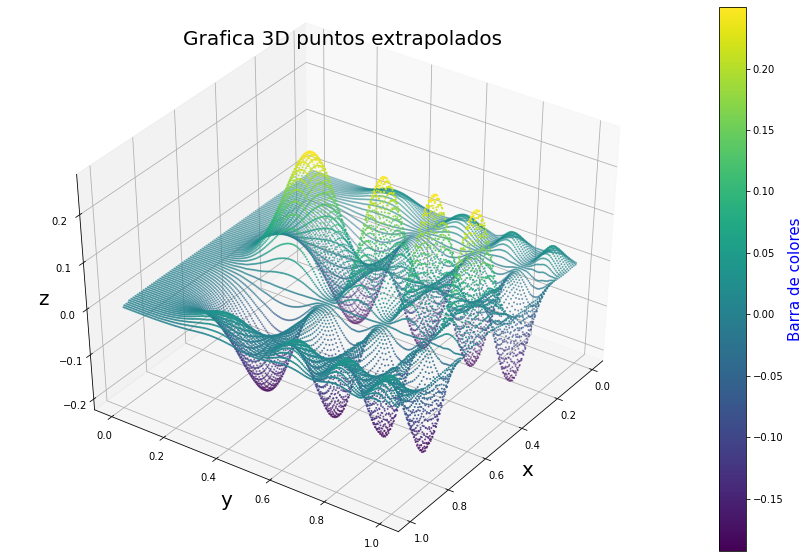

In [190]:
figura = plt.figure(figsize=(15,10)) # Creamos la figura, con un tamaño de 15x10 unidades de Python

ax = plt.axes(projection='3d') # Creamos un conjunto de ejes 3D llamados "ax"

superficie = ax.scatter(x_nuevo,y_nuevo,z_nuevo,c=z_nuevo,cmap="viridis", s=1) # con ax.scatter graficamos la superficie a punta de puntos. Los primeros tres parámetros son x,y,z. Luego con c=z exigimos que el color de los puntos se determine por la altura en z de los puntos. Luego ponemos el mapa de colores de la superficie. Los posibles mapas de colores se pueden encontrar en: https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html. También se pueden usar los demás parámetros que usamos generalmente con plt.scatter()

barra_de_colores = figura.colorbar(superficie) # Graficamos la barra de colores asociada a la superficie
barra_de_colores.set_label("Barra de colores", rotation=90, fontsize=15, color="blue") # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90 gradios y los demás parámetros son los mismos que se le pueden asignar a cualquier otro título, como con plt.title() o plt.xlabel()

ax.set_title("Grafica 3D puntos extrapolados", fontsize=20) # con ax.set_title() podemos modificar el título de la gráfica. Los parámetros son los mismos que plt.title()
ax.set_xlabel("x", fontsize=20) # con ax.set_xlabel() modificamos el nombre del eje x. Los parámetros son los mismos que plt.xlabel(). Lo mismo para los demás ejes.
ax.set_ylabel("y", fontsize=20)
ax.set_zlabel("z", fontsize=20)


ax.view_init(40,35) # Giramos la gráfica 40 grados polarmente y 35 grados azimutalmente
plt.show()

## Otro ejemplo de interpolación en varias variables pero con imagenes (matrices)

Para el caso de querer por ejemplo suavizar una imagen con muy poca resolución podemos usar un procedimiento similar al del ejemplo anterior. Supongamos que tenemos la siguiente imagen de baja calidad con tamaño 10x10

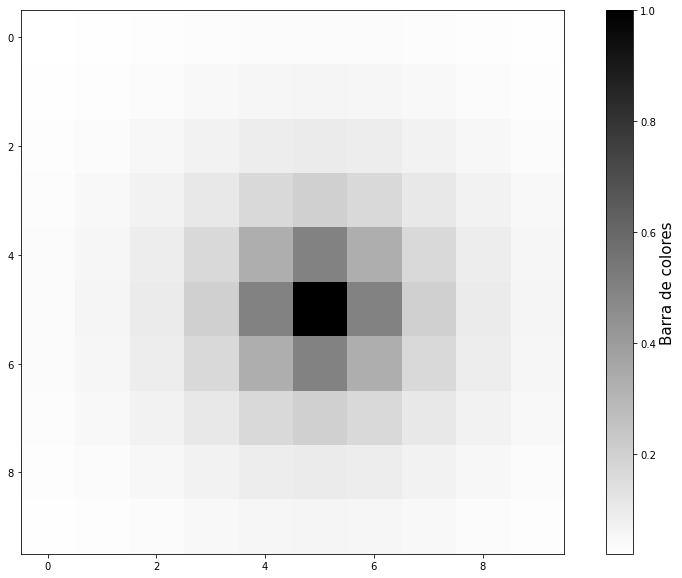

In [191]:
import numpy as np
from scipy.interpolate import griddata # Nos servirá para hacer la interpolación
import matplotlib.pyplot as plt

imagen_baja_calidad = np.zeros((10,10)) # Creamos una matriz de ceros

for i in range(10):
    for j in range(10):
        imagen_baja_calidad[i,j] = 1/(1 + (i-5)**2 + (j-5)**2) # Hacemos que la matriz tenga como entradas los valores de la función z(x,y) = 1/(1 + (x-5)^2 + (y-5)^2)

# Los anteriores pasos son solo para crear la imagen (matriz) de baja calidad. Si quisieramos, también podríamos importar la matriz de un archivo de texto externo y ya... funcionará de las dos formas

figura = plt.figure(figsize=(15,10))
imagen = plt.imshow(imagen_baja_calidad,cmap="binary") # Graficamos la imagen.
barra_de_colores = figura.colorbar(imagen) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Barra de colores", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

Como se observa, la imagen se nota bastante pixelada (dado que es una imagen con solo 10x10 pixeles). Sin embargo interpolando podríamos lograr una mejora considerable en la resolución de la imagen:

El tamaño de la matriz nueva será:  (100, 100)


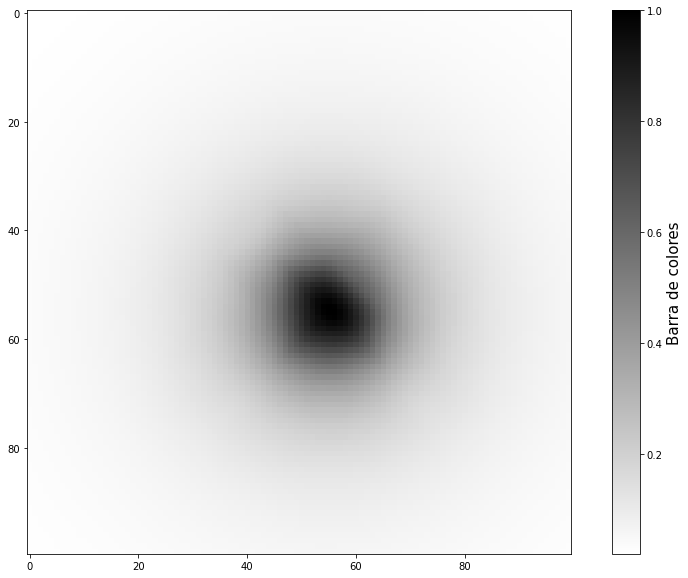

In [193]:
x = [] # Creamos nuestros puntos "x", "y", "z"
y = []
z = []

tamano_matriz = np.shape(imagen_baja_calidad)
filas = tamano_matriz[0]
columnas = tamano_matriz[1]

for i in range(filas):
    for j in range(columnas):
        x.append(i)
        y.append(j)
        z.append(imagen_baja_calidad[i,j])

x, y, z = np.array(x), np.array(y), np.array(z)

# Aca ya tenemos nuestros datos x,y,z. Ahora solo queda interpolarlos.

grid_x, grid_y = np.mgrid[0:9:100j, 0:9:100j] # Creamos la rejilla, tal como se hizo en el primer ejemplo de interpolación en 2D. En este caso exigimos que el nuevo tamaño de la imagen sea de 100x100 y se pone 0:9 dado que los valores de i y j varian desde 0 hasta 9 en principio.  

print("El tamaño de la matriz nueva será: ", np.shape(grid_x)) # Fijarse que el tamaño de la matriz si es el que queremos

puntos_xy = np.vstack((x,y)).T # Hacemos este paso que ya se había explicado en el ejemplo previo

imagen_nueva = griddata(puntos_xy, z, (grid_x, grid_y), method='cubic') # Hacemos interpolacion cúbica. Solo permite "linear", "quadratic" y "cubic"

figura = plt.figure(figsize=(15,10))
imagen = plt.imshow(imagen_nueva,cmap="binary") # Graficamos la imagen.
barra_de_colores = figura.colorbar(imagen) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Barra de colores", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

# Ajuste de Curvas

Ahora vamos a pasar de la interpolación al ajuste de curvas. Ajustar una curva quiere decir que, si tenemos una función modelo que depende de algunos parámetros constantes y un conjunto de puntos, intentaremos encontrar los parámetros constantes óptimos tal que nuestra función modelo se ajuste lo más posible a nuestros puntos. Vamos a ver un ejemplo:

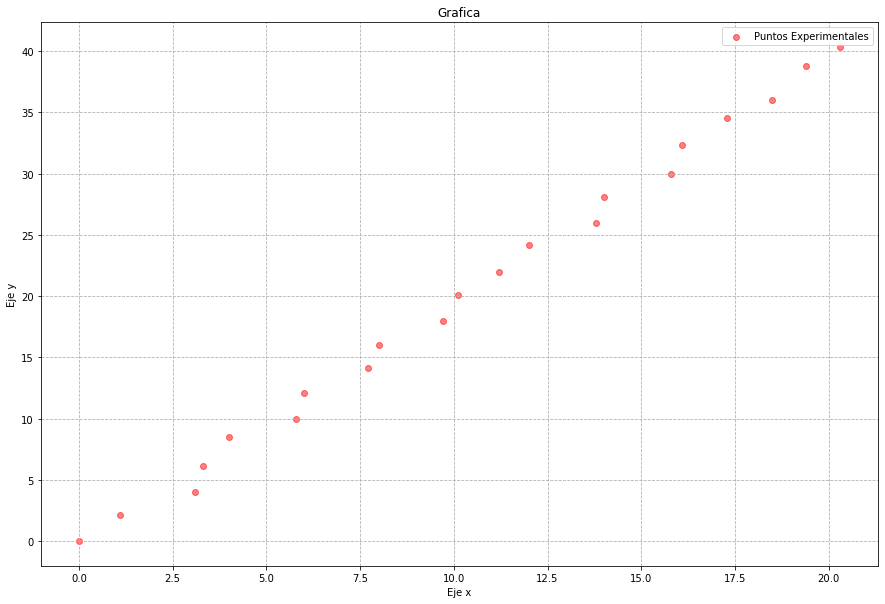

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # Importamos la clase curve_fit de scipy, que nos ayudará a hacer el ajuste.

x = np.array([0,1.1,3.1,3.3,4,5.8,6,7.7,8,9.7,10.1,11.2,12,13.8,14,15.8,16.1,17.3,18.5,19.4,20.3])
y = np.array([0,2.1,4,6.1,8.5,10,12.1,14.1,16,18,20.1,22,24.2,26,28.1,30,32.3,34.5,36,38.8,40.34]) 

# Graficamos los puntos...
figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x,y,color="red",alpha=0.5, label="Puntos Experimentales")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("Grafica")
plt.legend()
plt.show()

Hmmm...los puntos parecen seguir una tendencia lineal. Esto nos hace pensar que podemos ajustar los puntos a una línea recta! Definamos nuestra función modelo a la cual queremos ajustar.

In [195]:
def funcion_modelo(x,a,b): # Nuestra función modelo es una línea recta, que tiene como parámetros constantes a y b. 
    return a*x + b

Ya habiendo definido la función modelo a la que queremos ajustar los puntos y teniendo los puntos, podemos ajustar los puntos a la función modelo! Se hará de la siguiente forma:

Array con los valores óptimos de los parámetros a y b:
[ 2.00468171 -0.57985085]


Matriz de covarianza
[[ 0.00081834 -0.00846394]
 [-0.00846394  0.11774151]]


Errores asociados a cada parámetro:
[0.02860659 0.34313483]


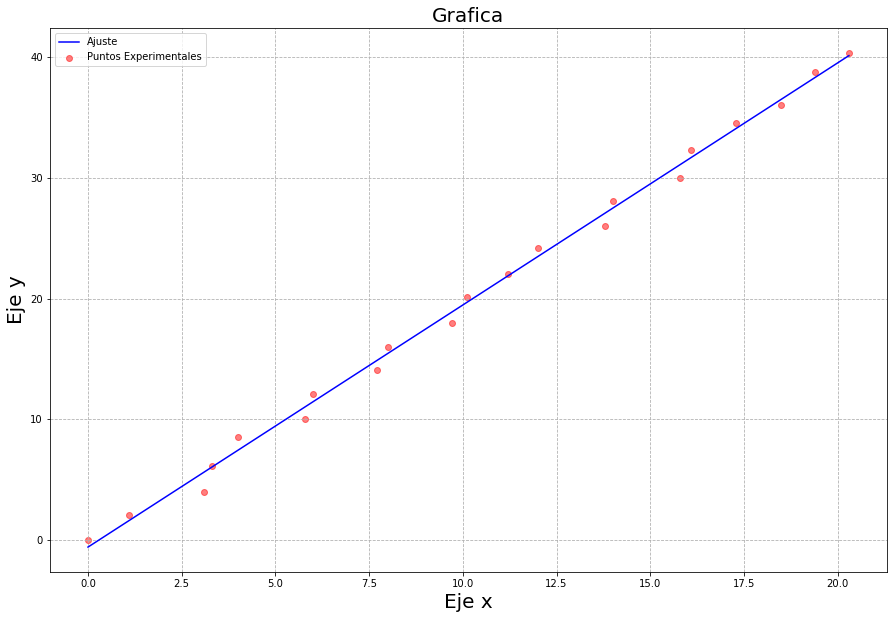

In [196]:
popt, pcov = curve_fit(funcion_modelo,x,y) # Usamos curve_fit() para poder encontrar los valores óptimos de los parámetros a y b. curve_fit() nos devuelve un array llamado popt con los valores óptimos de los parámetros y también nos da la matriz de covarianza pcov. La matriz de covarianza sirve para encontrar los errores asociados a los parámetros óptimos 
errores = np.sqrt(np.diag(pcov)) # para encontrar los errores debemos extraer la diagonal de la matriz de covarianza y luego, a este array con los elementos de la siagonal, sacarle la raiz cuadrada. Esto tiene que ser así ya que la diagonal de la matriz de covarianza tiene el valor de la varianza (sigma^2) asociado a cada parámetro. El error (sigma) no es más que la raiz de la varianza, también llamado desviación estandar.


print("Array con los valores óptimos de los parámetros a y b:")
print(popt)
print("\n")
print("Matriz de covarianza")
print(pcov)
print("\n")
print("Errores asociados a cada parámetro:")
print(errores)

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x,y,color="red",alpha=0.5, label="Puntos Experimentales") # Graficamos los puntos originales
plt.plot(x,funcion_modelo(x,*popt), color="blue", label="Ajuste")# Graficamos la función modelo con los parámetros óptimos. Pudimos escribir funcion_modelo(x,popt[0],popt[1]) ya que la funcion_modelo() tiene 3 parámetros de entrada, pero poner funcion_modelo(x,*popt) es un shortcut para hacer exactamente lo mismo y sirve para cualquier cantidad de parámetros que usemos
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica", fontsize=20)
plt.legend()
plt.show()

De esta forma podemos ajustar un conjunto de puntos a una curva. Aunque parece sencillo, este método está basado en el método de mínimos cuadrados. El método de mínimos cuadrados, a muy grandes rasgos, dice que el valor óptimo de los parámetros de ajuste $\lambda_k$ se puede obtener de la siguiente forma: $$\begin{pmatrix} \lambda_1 \\ \lambda_2 \\ \vdots \\ \lambda_k \end{pmatrix} = \begin{pmatrix} \langle f_1, f_1 \rangle &  \langle f_1, f_2 \rangle & \cdots & \langle f_1, f_k \rangle \\ \langle f_2, f_1 \rangle &  \langle f_2, f_2 \rangle & \cdots & \langle f_2, f_k \rangle \\ \vdots &  \vdots & \cdots & \vdots \\ \langle f_k, f_1 \rangle &  \langle f_k, f_2 \rangle & \cdots & \langle f_k, f_k \rangle \end{pmatrix}^{-1}\begin{pmatrix} \langle f_1, y \rangle \\ \langle f_2, y \rangle \\ \vdots \\ \langle f_k, y \rangle \end{pmatrix},$$ donde $k$ es el número de parámetros constantes que queremos desear, $$\langle f, g \rangle = \sum_{i=1}^{N} f(x_i)g(x_i),$$ $N$ el número de puntos que tenemos y $y$ son los valores en $y$ de los puntos que ya tenemos. Además las funciones $f_i$ surgen de la expresión de la función modelo $f(x)$, donde asumimos que esta se puede escribir como $$f(x) = \sum_{i=1}^{k}\lambda_if_i(x).$$ Por ejemplo, en nuestro caso la función modelo es $f(x) = ax + b$. Esta función puede ser escrita como $$f(x) = \lambda_1 f_1(x) + \lambda_2 f_2(x),$$ con $\lambda_1 = a, \lambda_2 = b, f_1(x) = x$ y $f_2(x)=1$

Implementemos esto directamente.

Array con los valores óptimos de los parámetros a y b:
[ 2.00468171 -0.57985084]


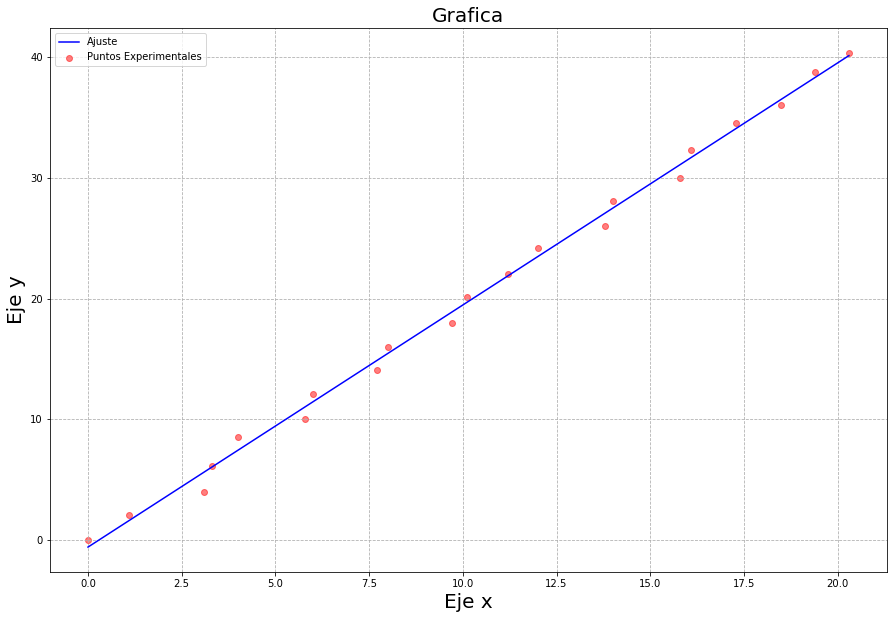

In [197]:
x = np.array([0,1.1,3.1,3.3,4,5.8,6,7.7,8,9.7,10.1,11.2,12,13.8,14,15.8,16.1,17.3,18.5,19.4,20.3])
y = np.array([0,2.1,4,6.1,8.5,10,12.1,14.1,16,18,20.1,22,24.2,26,28.1,30,32.3,34.5,36,38.8,40.34]) 

def f1(x):
    return x

def f2(x):
    return x**0 # No sería correcto hacer return 1 solamente ya que lo que debemos retornar con las funciones son arrays (con los posibles valores de las funciones). Así, si hacemos x**0 tendremos un array el cual todas sus componentes serán 1, como debería ser

k = 2 # Numero de parametros que queremos encontrar (a y b).
functions = np.array([f1,f2]) # Creamos un array con las funciones que creamos
M_least = np.zeros((k,k)) # Creamos una matriz de tamaño 2x2 que tendrá los componentes <f_i,f_j> pero por el momento solo tiene ceros
b_least = np.zeros(k) # Creamos un vector que contendra las componentes <f_i,y> pero por el momento solo tiene ceros

for i, function1 in enumerate(functions):
    for j, function2 in enumerate(functions):
        M_least[i,j] = np.sum(function1(x)*function2(x)) # Creamos la matriz

for i, function in enumerate(functions):
    b_least[i] = np.sum(function(x)*y)


lambdas = np.linalg.solve(M_least,b_least) # Hallamos el valor de los lambdas (parámetros constantes). Los lambdas se pueden hallar como la solución a la ecuación Mx = b, donde M es la matriz con componentes <f_i,f_j>, b es el vector cuyas componentes son <f_i,y> y x es el vector con los lambdas. La funcion np.linalg.solve() permite encontrar el vector x, metiendo como parámetros de entrada a M y b.
print("Array con los valores óptimos de los parámetros a y b:")
print(lambdas)

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x,y,color="red",alpha=0.5, label="Puntos Experimentales") # Graficamos los puntos originales
plt.plot(x,funcion_modelo(x,*lambdas), color="blue", label="Ajuste") # Graficamos la función modelo con los parámetros óptimos. 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica", fontsize=20)
plt.legend()
plt.show()

Como se observa, los valores de los parámetros óptimos son muy similares a los encontrados con curve_fit(). Hay una pequeña salvedad y es que curve_fit() no utiliza un método exactamente igual al que hicimos, sino que ejecuta el algoritmo de Levenberg-Marquardt, que es un algoritmo que permite encontrar los parámetros $\lambda$ óptimos no solo para mínimos cuadrados normales (f(x) no depende de potencias mayores a 1 en los lambdas), sino también en caso de que tengamos mínimos cuadrados no lineales (f(x) depende de potencias mayores a 1 en los lambdas). 

En caso de que en un primer intento no parezca que curve_fit() esté encontrando los parámetros correctos (la curva azul que debe pasar por los puntos rojos no es como se espera), podemos ayudar al algoritmo aportando algunas condiciones iniciales que pueden ayudar a que curve_fit() converja a los resultados correctos:

Array con los valores óptimos de los parámetros a y b:
[ 2.00468171 -0.57985084]


Matriz de covarianza
[[ 0.00081834 -0.00846393]
 [-0.00846393  0.11774145]]


Errores asociados a cada parámetro:
[0.02860657 0.34313473]


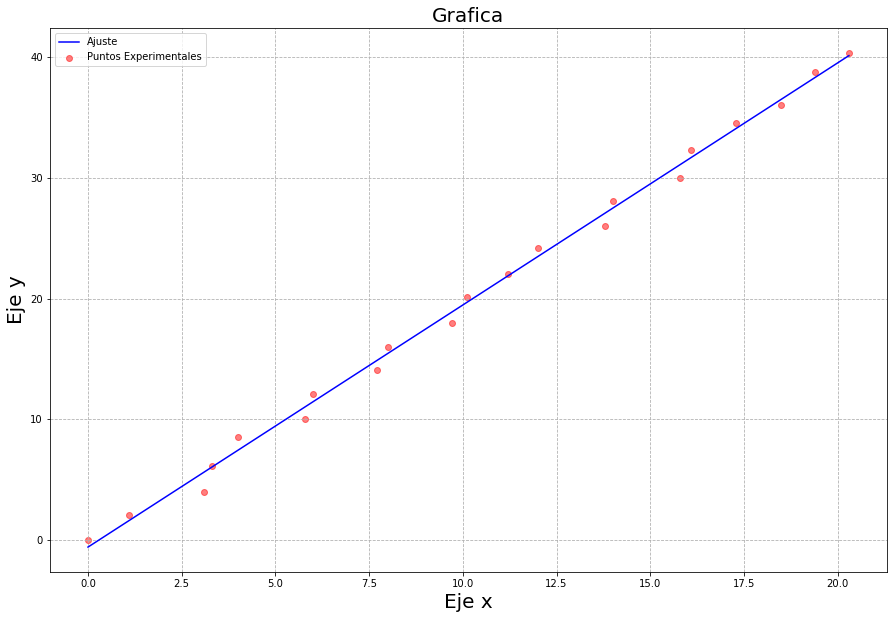

In [198]:
popt, pcov = curve_fit(funcion_modelo,x,y, p0=(2,1)) # Agregamos un parámetro llamado p0, también llamado guess inicial, que contiene unos valores iniciales tentativos que podemos dar para los parámetros a y b. En este caso el valor tentativo de a es 2 y el de b es 1. 

errores = np.sqrt(np.diag(pcov)) 

print("Array con los valores óptimos de los parámetros a y b:")
print(popt)
print("\n")
print("Matriz de covarianza")
print(pcov)
print("\n")
print("Errores asociados a cada parámetro:")
print(errores)

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x,y,color="red",alpha=0.5, label="Puntos Experimentales") # Graficamos los puntos originales
plt.plot(x,funcion_modelo(x,*popt), color="blue", label="Ajuste")# Graficamos la función modelo con los parámetros óptimos. Pudimos escribir funcion_modelo(x,popt[0],popt[1]) ya que la funcion_modelo() tiene 3 parámetros de entrada, pero poner funcion_modelo(x,*popt) es un shortcut para hacer exactamente lo mismo y sirve para cualquier cantidad de parámetros que usemos
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica", fontsize=20)
plt.legend()
plt.show()

# Ajustando polinomios a un conjunto de puntos

Supongamos que tengo un conjunto de puntos (x,y) y quisiera encontrar un polinomio de orden $m$ que pase por todos los puntos. ¿Cómo lo logro? La respuesta está en np.polyfit(). Miremos cómo se usa:

Coeficientes del polinomio de grado 3
[ 0.02089102 -0.42079422  3.16671795 11.66582087]


Coeficientes del polinomio de grado 6
[ 1.22059426e-04 -2.25297480e-03 -1.20620639e-02  5.02924390e-01
 -3.71740194e+00  1.07227264e+01  7.84594410e+00]


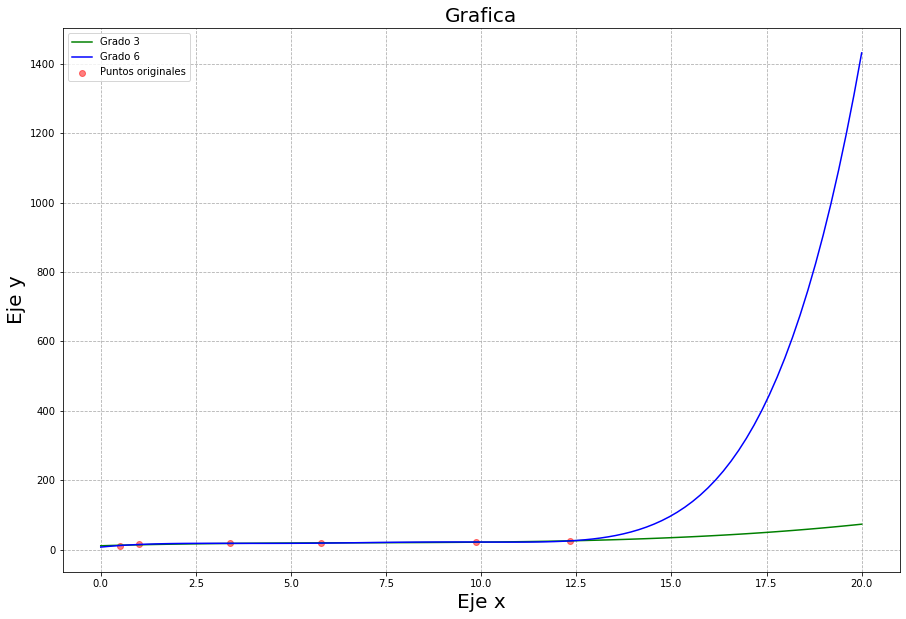

In [199]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([0.5, 1, 3.4, 5.8, 9.87, 12.34])
y = np.array([12.34, 15.34, 18.65, 19.32, 22.45, 25.76])

coef_3 = np.polyfit(x,y,3) # Uso np.polyfit() que recibe como parámetros los puntos en "x" y "y", además del orden del polinomio que quiero ajustar a esos puntos. Esta función retorna los 4 coeficientes del polinomio en un array. Un polinomio de orden 3 tiene 4 coeficientes asociados: c_1 x^3 + c_2 x^2 + c_3 x + c_4
coef_6 = np.polyfit(x,y,6)

print("Coeficientes del polinomio de grado 3")
print(coef_3)
print("\n")
print("Coeficientes del polinomio de grado 6")
print(coef_6)

p3 = np.poly1d(coef_3) # Con np.poly1d() podemos evaluar el polinomio que deseemos en cualquier punto que queramos. En este caso p3 representa el polinomio de grado 3. Si quiero saber cuánto vale este polinomio en x=5 entonces imprimo p3(5) y obtengo el resultado
p6 = np.poly1d(coef_6)

x_n = np.linspace(0,20,100) # Creo un nuevo array para el eje x, esto con el fin de graficar el polinomio entre 0 y 20

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x,y,color="red",alpha=0.5,label="Puntos originales")
plt.plot(x_n, p3(x_n), color="green", label="Grado 3")# Graficamos el polinomio de grado 3
plt.plot(x_n, p6(x_n), color="blue", label="Grado 6")# Graficamos el polinomio de grado 6
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica", fontsize=20)
plt.legend()
plt.show()